In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data['Home Team Goal Differential'] = train_data['Home Team Goals'] - train_data['Away Team Goals']

In [4]:
train_data.columns

Index(['Unnamed: 0', 'Year', 'Datetime', 'Stage', 'Stadium', 'City',
       'Home Team Name', 'Home Team Goals', 'Away Team Goals',
       'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Home Team Result',
       'Home Rank', 'Away Rank', 'Home Temp', 'Home Rain',
       'Home GDP (millions)', 'Home Population',
       'Home GDP per Person (dollars)', 'Away Temp', 'Away Rain',
       'Away GDP (millions)', 'Away Population',
       'Away GDP per Person (dollars)', 'Host Temp', 'Host Rain',
       'Home Temp Diff', 'Home Rain Diff', 'Away Temp Diff', 'Away Rain Diff',
       'Home Team Line', 'Away Team Line', 'Home Team Goal Differential'],
      dtype='object')

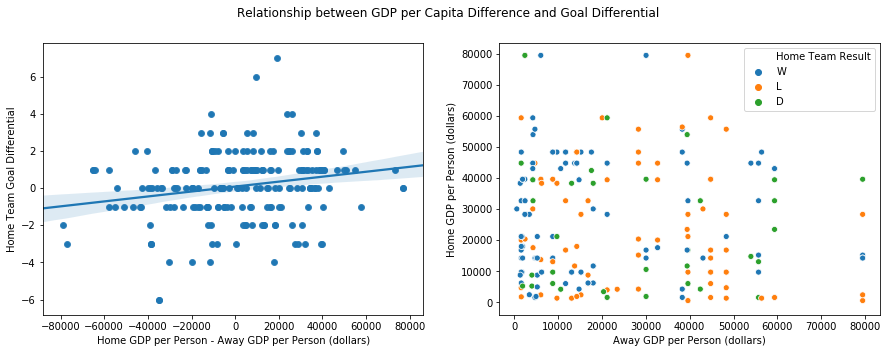

In [11]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
sns.scatterplot(train_data['Home GDP per Person (dollars)'] - train_data['Away GDP per Person (dollars)'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.regplot(train_data['Home GDP per Person (dollars)'] - train_data['Away GDP per Person (dollars)'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.scatterplot(train_data['Away GDP per Person (dollars)'], train_data['Home GDP per Person (dollars)'], hue = train_data['Home Team Result'], ax = ax[1])
ax[0].set_xlabel('Home GDP per Person - Away GDP per Person (dollars)')
fig.suptitle('Relationship between GDP per Capita Difference and Goal Differential')
fig.show()
plt.savefig('images/gdp_capita.png')

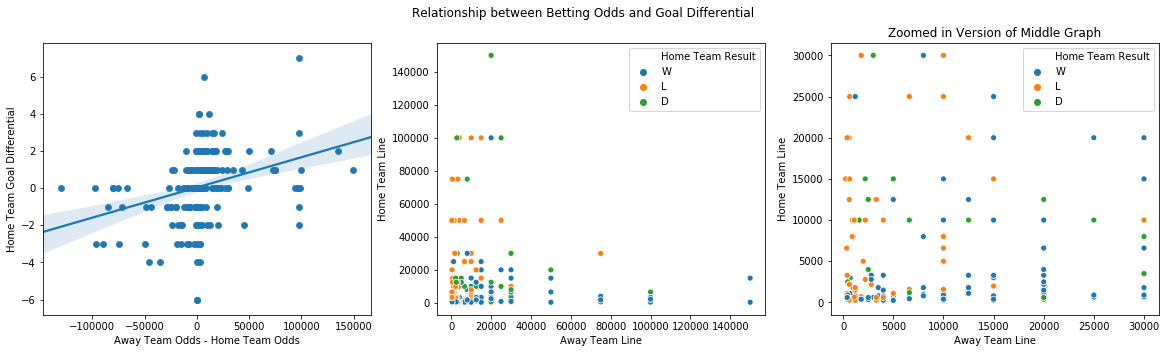

In [6]:
fig, ax = plt.subplots(1,3, figsize= (20,5))
sns.scatterplot(train_data['Away Team Line'] - train_data['Home Team Line'],train_data['Home Team Goal Differential'], ax = ax[0] )
sns.regplot(train_data['Away Team Line'] - train_data['Home Team Line'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.scatterplot(train_data['Away Team Line'], train_data['Home Team Line'], hue = train_data['Home Team Result'] , ax = ax[1])
sns.scatterplot(train_data['Away Team Line'][train_data['Away Team Line'] < 35000], train_data['Home Team Line'][train_data['Home Team Line'] < 35000], hue = train_data['Home Team Result'], ax = ax[2])
ax[0].set_xlabel('Away Team Odds - Home Team Odds')
ax[2].set_title('Zoomed in Version of Middle Graph')
fig.suptitle('Relationship between Betting Odds and Goal Differential')
fig.show()
plt.savefig('images/odds.png')

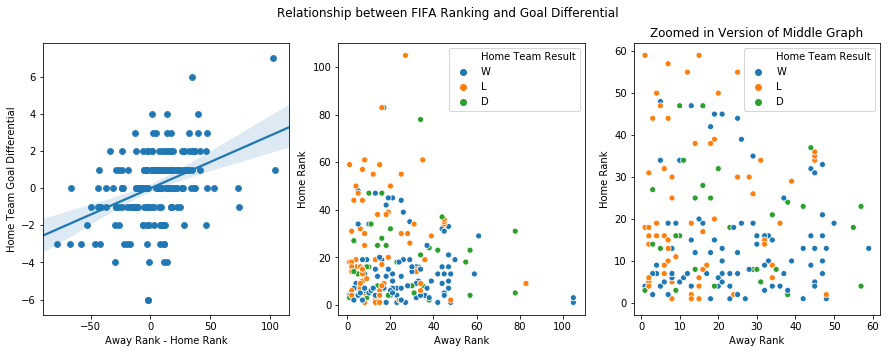

In [7]:
fig, ax = plt.subplots(1,3, figsize= (15,5))
sns.scatterplot(train_data['Away Rank'] - train_data['Home Rank'],train_data['Home Team Goal Differential'],ax = ax[0])
sns.regplot(train_data['Away Rank'] - train_data['Home Rank'],train_data['Home Team Goal Differential'],ax = ax[0])
sns.scatterplot(train_data['Away Rank'], train_data['Home Rank'], hue = train_data['Home Team Result'], ax = ax[1])
sns.scatterplot(train_data['Away Rank'][train_data['Away Rank'] < 60], train_data['Home Rank'][train_data['Home Rank'] < 60], hue = train_data['Home Team Result'], ax = ax[2])
ax[0].set_xlabel('Away Rank - Home Rank')
fig.suptitle('Relationship between FIFA Ranking and Goal Differential')
ax[2].set_title('Zoomed in Version of Middle Graph')
fig.show()
plt.savefig('images/fifa_rank.png')

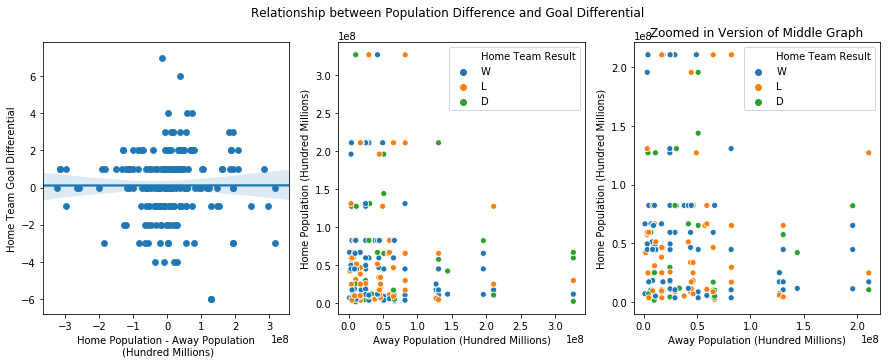

In [8]:
fig, ax = plt.subplots(1,3, figsize= (15,5))
sns.scatterplot(train_data['Home Population'] - train_data['Away Population'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.regplot(train_data['Home Population'] - train_data['Away Population'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.scatterplot(train_data['Away Population'], train_data['Home Population'], hue = train_data['Home Team Result'], ax = ax[1])
sns.scatterplot(train_data['Away Population'][train_data['Away Population'] < 250000000], train_data['Home Population'][train_data['Home Population'] < 250000000], hue = train_data['Home Team Result'], ax = ax[2])
fig.suptitle('Relationship between Population Difference and Goal Differential')

ax[0].set_title('')
ax[0].set_xlabel('Home Population - Away Population\n (Hundred Millions)')


ax[2].set_title('Zoomed in Version of Middle Graph')
ax[1].set_ylabel('Home Population (Hundred Millions)')
ax[1].set_xlabel('Away Population (Hundred Millions)')
ax[2].set_ylabel('Home Population (Hundred Millions)')
ax[2].set_xlabel('Away Population (Hundred Millions)')



fig.show()
plt.savefig('images/population.png')

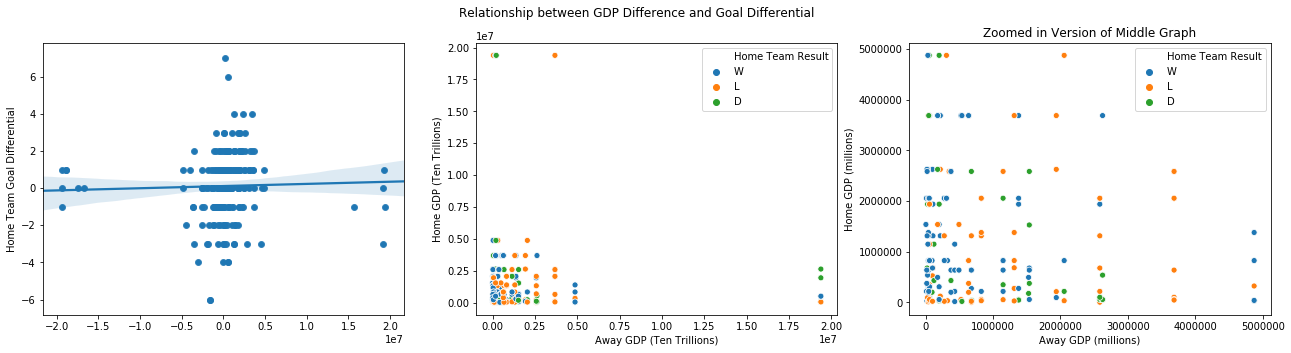

In [9]:
fig, ax = plt.subplots(1,3, figsize= (22,5))
sns.scatterplot(train_data['Home GDP (millions)'] - train_data['Away GDP (millions)'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.regplot(train_data['Home GDP (millions)'] - train_data['Away GDP (millions)'],train_data['Home Team Goal Differential'], ax = ax[0])
sns.scatterplot(train_data['Away GDP (millions)'], train_data['Home GDP (millions)'], hue = train_data['Home Team Result'], ax = ax[1])
sns.scatterplot(train_data['Away GDP (millions)'][train_data['Away GDP (millions)'] < 10000000], train_data['Home GDP (millions)'][train_data['Home GDP (millions)'] < 10000000], hue = train_data['Home Team Result'], ax = ax[2])
fig.suptitle('Relationship between GDP Difference and Goal Differential')
ax[2].set_title('Zoomed in Version of Middle Graph')
ax[1].set_ylabel('Home GDP (Ten Trillions)')
ax[1].set_xlabel('Away GDP (Ten Trillions)')
fig.show()
plt.savefig('images/gdp_total.png')

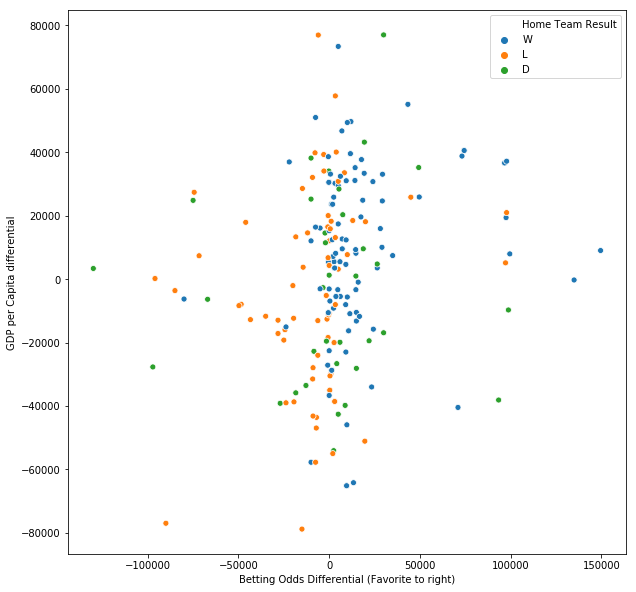

In [10]:
fig, ax = plt.subplots(1,1, figsize= (10,10))
sns.scatterplot(train_data['Away Team Line'] - train_data['Home Team Line'],
                train_data['Home GDP per Person (dollars)'] - train_data['Away GDP per Person (dollars)'], 
                hue = train_data['Home Team Result'], ax = ax )
ax.set_xlabel('Betting Odds Differential (Favorite to right)')
ax.set_ylabel('GDP per Capita differential')
fig.show()
plt.savefig('images/odds_gdp.png')